In [1]:
from ntscraper import Nitter
import pandas as pd

06-Mar-24 12:07:26 - NumExpr defaulting to 8 threads.


In [2]:
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt


In [3]:
scraper = Nitter()

Testing instances: 100%|██████████| 77/77 [02:40<00:00,  2.09s/it]


In [4]:
def get_tweets(name,modes,no):
    tweets = scraper.get_tweets(name,mode = modes, number = no)    
    final_tweets = []
    for tweet in tweets['tweets']:
        data = [tweet['link'],tweet['text'],tweet['date'], tweet['stats']['likes'],tweet['stats']['comments']]
        final_tweets.append(data)
    data = pd.DataFrame(final_tweets, columns = ['link','Tweets','Date','Likes','Count(Tweets)'])
    return data

In [12]:
data = get_tweets('AdityaBirlaGrp','user',200) # Use 'term', 'hashtag', or 'user'.

05-Mar-24 16:55:52 - No instance specified, using random instance https://nitter.privacydev.net
05-Mar-24 16:55:58 - Current stats for AdityaBirlaGrp: 20 tweets, 0 threads...
05-Mar-24 16:56:02 - Current stats for AdityaBirlaGrp: 40 tweets, 0 threads...
05-Mar-24 16:56:06 - Current stats for AdityaBirlaGrp: 60 tweets, 0 threads...
05-Mar-24 16:56:11 - Current stats for AdityaBirlaGrp: 80 tweets, 0 threads...
05-Mar-24 16:56:13 - Empty page on https://nitter.privacydev.net


In [44]:
data

,link,Tweets,Date,Likes,Count(Tweets),Subjectivity,Polarity,Analysis,Label
0,https://twitter.com/AdityaBirlaGrp/status/1764...,adityabirlagroup biginyourlif ananyabirla svat...,"Mar 5, 2024 · 8:04 AM UTC",1,0,0.000000,0.000000,Neutral,1
1,https://twitter.com/AdityaBirlaGrp/status/1764...,mark the largest invest by privat equiti inves...,"Mar 5, 2024 · 8:04 AM UTC",78,2,0.187500,0.000000,Neutral,1
2,https://twitter.com/AdityaBirlaGrp/status/1764...,icon idea by remark speaker from around the gl...,"Mar 3, 2024 · 1:52 PM UTC",702,8,0.451136,0.355114,Positive,2
3,https://twitter.com/AdityaBirlaGrp/status/1763...,live now! tap into the puls of innov and inspi...,"Mar 2, 2024 · 7:40 AM UTC",464,1,0.642857,0.304518,Positive,2
4,https://twitter.com/AdityaBirlaGrp/status/1763...,"light out, we’r get readi for you! here’ a pee...","Mar 2, 2024 · 3:31 AM UTC",16,2,0.750000,0.291667,Positive,2
...,...,...,...,...,...,...,...,...,...
75,https://twitter.com/AdityaBirlaGrp/status/1738...,abgrewind2023 adityabirlagroup biginyourlif re...,"Dec 22, 2023 · 7:38 AM UTC",8,0,0.000000,0.000000,Neutral,1
76,https://twitter.com/AdityaBirlaGrp/status/1738...,we imagin anew with innov set to transform ind...,"Dec 22, 2023 · 7:38 AM UTC",244,2,0.416667,0.375000,Positive,2
77,https://twitter.com/AdityaBirlaGrp/status/1737...,abgrewind2023 adityabirlagroup biginyourlif re...,"Dec 21, 2023 · 10:41 AM UTC",6,0,0.000000,0.000000,Neutral,1
78,https://twitter.com/AdityaBirlaGrp/status/1737...,a year in build bond that shape tomorrow. we u...,"Dec 21, 2023 · 10:41 AM UTC",307,2,0.531250,0.406250,Positive,2


In [15]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
data['Tweets'] = data['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
data.sample(10)

,link,Tweets,Date,Likes,Count(Tweets)
45,https://twitter.com/AdityaBirlaGrp/status/1753...,Aditya Birla Capital has reported stellar Q3FY...,"Feb 1, 2024 · 12:53 PM UTC",389,6
11,https://twitter.com/AdityaBirlaGrp/status/1762...,Block your calendar for the 2nd of March! re...,"Feb 26, 2024 · 12:34 PM UTC",642,4
58,https://twitter.com/AdityaBirlaGrp/status/1741...,How are you prepping for endless opportunities...,"Dec 31, 2023 · 9:30 AM UTC",754,6
60,https://twitter.com/AdityaBirlaGrp/status/1741...,ABGRewind2023 AdityaBirlaGroup BigInYourLife R...,"Dec 30, 2023 · 10:41 AM UTC",5,1
24,https://twitter.com/AdityaBirlaGrp/status/1759...,What gets our leaders going? How did they unlo...,"Feb 19, 2024 · 5:39 AM UTC",225,6
3,https://twitter.com/AdityaBirlaGrp/status/1763...,Live now! Tap into the pulse of innovation an...,"Mar 2, 2024 · 7:40 AM UTC",464,1
30,https://twitter.com/AdityaBirlaGrp/status/1758...,Grounded in our commitment to social responsib...,"Feb 16, 2024 · 6:24 AM UTC",302,2
70,https://twitter.com/AdityaBirlaGrp/status/1738...,Let the spirit of the holiday season bring you...,"Dec 24, 2023 · 6:29 PM UTC",277,5
26,https://twitter.com/AdityaBirlaGrp/status/1759...,Picture yourself cruising down the open road t...,"Feb 18, 2024 · 5:31 AM UTC",172,2
1,https://twitter.com/AdityaBirlaGrp/status/1764...,Marking the largest investment by private equi...,"Mar 5, 2024 · 8:04 AM UTC",78,2


In [45]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
data['Subjectivity'] = data['Tweets'].apply(getSubjectivity)
data['Polarity'] = data['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
data.sample(10)

,link,Tweets,Date,Likes,Count(Tweets),Subjectivity,Polarity,Analysis,Label
63,https://twitter.com/AdityaBirlaGrp/status/1740...,reflect on yet anoth year of purpose-driven im...,"Dec 28, 2023 · 7:27 AM UTC",624,13,0.500000,0.136364,Neutral,1
65,https://twitter.com/AdityaBirlaGrp/status/1740...,"our campaign turn heads, made headlines, and s...","Dec 27, 2023 · 2:57 PM UTC",415,8,0.500000,0.450000,Positive,2
43,https://twitter.com/AdityaBirlaGrp/status/1754...,"thi world cancer day, let’ empow ourselv and o...","Feb 4, 2024 · 4:51 AM UTC",391,6,0.225962,-0.062500,Positive,2
2,https://twitter.com/AdityaBirlaGrp/status/1764...,icon idea by remark speaker from around the gl...,"Mar 3, 2024 · 1:52 PM UTC",702,8,0.277273,0.085227,Positive,2
30,https://twitter.com/AdityaBirlaGrp/status/1758...,"ground in our commit to social responsibility,...","Feb 16, 2024 · 6:24 AM UTC",302,2,0.283333,0.084848,Positive,2
50,https://twitter.com/AdityaBirlaGrp/status/1748...,"improv oper efficiencies, coupl with lower fue...","Jan 19, 2024 · 12:33 PM UTC",15,7,0.487179,0.173077,Positive,2
16,https://twitter.com/AdityaBirlaGrp/status/1760...,"with the launch of our latest business, birla ...","Feb 22, 2024 · 12:46 PM UTC",932,15,0.900000,0.500000,Positive,2
74,https://twitter.com/AdityaBirlaGrp/status/1738...,our triumph were greener thi year! from be the...,"Dec 23, 2023 · 6:28 AM UTC",260,6,0.312500,0.250000,Positive,2
22,https://twitter.com/AdityaBirlaGrp/status/1760...,we'r set to add new hue to your house. our pai...,"Feb 21, 2024 · 2:27 PM UTC",277,2,0.469697,0.136364,Positive,2
57,https://twitter.com/AdityaBirlaGrp/status/1741...,"onc in 4 years, we’r all given an extra day. t...","Dec 31, 2023 · 12:30 PM UTC",689,5,0.277273,0.068182,Positive,2


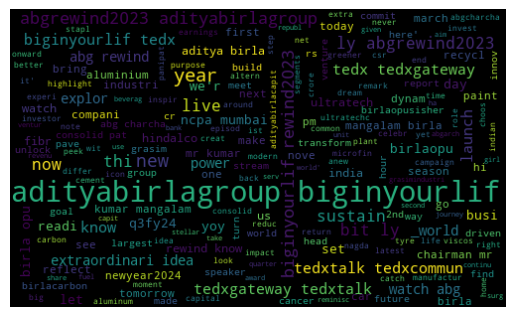

In [46]:
# word cloud visualization
allWords = ' '.join([twts for twts in data['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [47]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
data['Analysis'] = data['Polarity'].apply(getAnalysis)
# Show the dataframe
data.sample(10)

,link,Tweets,Date,Likes,Count(Tweets),Subjectivity,Polarity,Analysis,Label
51,https://twitter.com/AdityaBirlaGrp/status/1748...,ultratech report stellar earn for q3fy24 with ...,"Jan 19, 2024 · 12:33 PM UTC",399,9,0.125000,0.125000,Positive,2
71,https://twitter.com/AdityaBirlaGrp/status/1738...,abgrewind2023 adityabirlagroup biginyourlif re...,"Dec 24, 2023 · 6:03 AM UTC",9,2,0.000000,0.000000,Neutral,1
60,https://twitter.com/AdityaBirlaGrp/status/1741...,abgrewind2023 adityabirlagroup biginyourlif re...,"Dec 30, 2023 · 10:41 AM UTC",5,1,0.000000,0.000000,Neutral,1
73,https://twitter.com/AdityaBirlaGrp/status/1738...,abgrewind2023 adityabirlagroup biginyourlif re...,"Dec 23, 2023 · 6:28 AM UTC",8,1,0.000000,0.000000,Neutral,1
52,https://twitter.com/AdityaBirlaGrp/status/1747...,2007: the year we made the aluminum more susta...,"Jan 17, 2024 · 1:19 PM UTC",277,4,0.363636,0.315341,Positive,2
9,https://twitter.com/AdityaBirlaGrp/status/1762...,idea brew ✔️ collabor in the making✔️ it' back...,"Feb 27, 2024 · 6:49 AM UTC",14,1,0.000000,0.000000,Neutral,2
47,https://twitter.com/AdityaBirlaGrp/status/1751...,"turn a new page to a blend of perspectives, ou...","Jan 29, 2024 · 3:26 PM UTC",1077,20,0.454545,0.136364,Positive,2
2,https://twitter.com/AdityaBirlaGrp/status/1764...,icon idea by remark speaker from around the gl...,"Mar 3, 2024 · 1:52 PM UTC",702,8,0.277273,0.085227,Positive,2
65,https://twitter.com/AdityaBirlaGrp/status/1740...,"our campaign turn heads, made headlines, and s...","Dec 27, 2023 · 2:57 PM UTC",415,8,0.500000,0.450000,Positive,2
34,https://twitter.com/AdityaBirlaGrp/status/1757...,"ultratech cement switch gears, set to deploy a...","Feb 12, 2024 · 1:13 PM UTC",398,5,0.125000,0.000000,Neutral,1


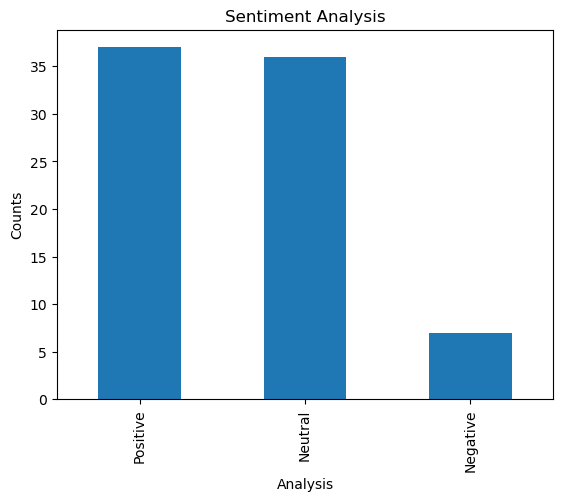

In [48]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind = 'bar')
plt.show()


In [49]:
final_df = data

In [50]:
final_df['Tweets']=final_df['Tweets'].astype(str)
final_df['Tweets']=final_df['Tweets'].apply(lambda x:x.lower())

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [52]:
import nltk
from nltk.stem.porter import *
ps=PorterStemmer()

In [53]:
def stem(text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y) #returns string after stemming

In [54]:
final_df['Tweets']= final_df['Tweets'].apply(stem)

In [55]:
le_model = LabelEncoder()
final_df['Label'] = le_model.fit_transform(final_df['Analysis'])

In [56]:
#Splitting the dataset into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(final_df['Tweets'], final_df['Label'],
                                                    test_size=0.2, random_state=42, stratify=final_df['Label'])

In [57]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (64,)
Shape of X_test:  (16,)


In [90]:
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('random_forest', (RandomForestClassifier()))
])

In [91]:
# Model training
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('random_forest', RandomForestClassifier())])

In [92]:
# Get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

In [93]:
# Print score
print(accuracy_score(y_test, y_pred))

0.5625


In [94]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.57      0.53         7
           2       0.62      0.71      0.67         7

    accuracy                           0.56        16
   macro avg       0.38      0.43      0.40        16
weighted avg       0.49      0.56      0.52        16



C:\Users\Prajwal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prajwal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prajwal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

In [64]:
# train test split
train, test = train_test_split(data, test_size = 0.2, stratify = data['Analysis'], random_state=21)

# get the shape of train and test split.
train.shape, test.shape

((64, 9), (16, 9))

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 38 to 42
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   link           64 non-null     object 
 1   Tweets         64 non-null     object 
 2   Date           64 non-null     object 
 3   Likes          64 non-null     int64  
 4   Count(Tweets)  64 non-null     int64  
 5   Subjectivity   64 non-null     float64
 6   Polarity       64 non-null     float64
 7   Analysis       64 non-null     object 
 8   Label          64 non-null     int32  
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 4.8+ KB


In [71]:
# create a TF-IDF vectorizer object
tfidf_vectorizer = TfidfVectorizer(lowercase= True, max_features=1000, stop_words='english')

# fit the object with the training data tweets
tfidf_vectorizer.fit(train['Tweets'].astype(str))

TfidfVectorizer(max_features=1000, stop_words='english')

In [72]:
# transform the train and test data
train_idf = tfidf_vectorizer.transform(train.Tweets)
test_idf  = tfidf_vectorizer.transform(test.Tweets)

In [84]:
# create the object of LinearRegression Model
model_LR = RandomForestClassifier()

# fit the model with the training data
model_LR.fit(train_idf, train.Label)

# predict the label on the traning data
predict_train = model_LR.predict(train_idf)

# predict the model on the test data
predict_test = model_LR.predict(test_idf)

In [85]:
print(classification_report(train.Label, predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        30

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [80]:
# define the stages of the pipeline
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(lowercase=True,
                                                      max_features=1000,
                                                      stop_words= 'english')),
                            ('model', LogisticRegression())])

# fit the pipeline model with the training data                            
pipeline.fit(train.Tweets, train.Label)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000, stop_words='english')),
                ('model', LogisticRegression())])

In [83]:
# clf.fit(train.Tweets, train.Label)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('random_forest', RandomForestClassifier())])

In [101]:
# sample tweet
text = ["Virat Kohli, AB de Villiers set to auction their 'Green Day' kits from 2016 IPL match to raise funds"]

# predict the label using the pipeline
pipeline.predict(text)

array([2])

In [103]:
clf.predict(text)

array([1])